<a href="https://colab.research.google.com/github/fabio-weydson/sandbox-datascience/blob/main/CE_3_1_por_Challenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de caso 3.1: O lançamento do Challenger

Configuração do *notebook*:

Sincronize sua conta do Google. Para isso, siga o link que aparece na saída da seguinte célula uma vez executada. Copie o código que aparece na tela e insira-o na saída da célula. Assim que visualizar a mensagem: `Google Drive sincronizado com sucesso!`poderá continuar executando o restante das células.

In [1]:
from google.colab import auth
auth.authenticate_user()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
data_drop = drive.CreateFile({'id':'1EsvjOlPQpss37_qQF-cXvCUi0IrPUs33'})
data_drop.GetContentFile('challenger-data.csv')

print('Google Drive sincronizado com sucesso!')

Google Drive sincronizado com sucesso!


Instalando as bibliotecas necessárias:

In [2]:
import pandas as pd
import numpy as np

from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

import matplotlib as mpl
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dados

Importando os dados do banco de dados `challenger-data.csv`

In [3]:
data = pd.read_csv('challenger-data.csv')

Análise exploratória preliminar

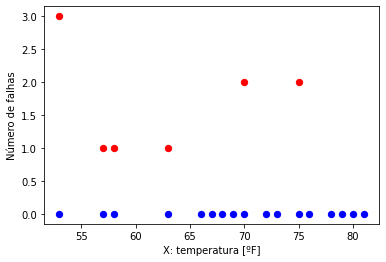

In [7]:
# criar subconjuntos de dados
failures = data.loc[(data.Y == 1)]
no_failures = data.loc[(data.Y == 0)]

# frequências
failures_freq = failures.X.value_counts()
no_failures_freq = no_failures.X.value_counts()

# mostrar os gráficos
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)),c='blue', s=40)
plt.xlabel('X: temperatura [ºF]')
plt.ylabel('Número de falhas')
plt.show()

# Definição do modelo e obtenção de resultados

In [8]:
# obtenha os dados no formato correto
y, X = dmatrices('Y ~ X', data, return_type = 'dataframe')

# execute o modelo
logit = sm.Logit(y, X)
result = logit.fit()

# obtenha um resumo dos resultados no modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.1549
Time:                        14:47:54   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.